主成分分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sample = 500

def gen_data(n_sample):
    mean = [0, 0]
    cov = [[2, 0.7], [0.7, 1]]
    # 多次元正規乱数の生成
    return np.random.multivariate_normal(mean, cov, n_sample)

def plt_data(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

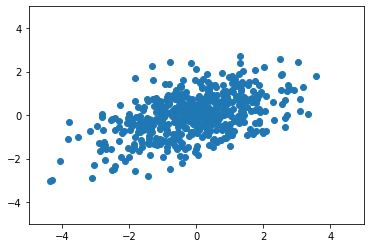

In [3]:
X = gen_data(n_sample)
plt_data(X)

In [4]:
n_components=2

def get_moments(X):
    mean = X.mean(axis=0)
    # 分散共分散行列を算出
    stan_cov = np.dot((X - mean).T, X - mean) / (len(X) - 1)
    return mean, stan_cov
    
def get_components(eigenvectors, n_components):
    W = eigenvectors[:, ::-1][:, :n_components]
    return W.T

def plt_result(X, first, second):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    # 第１主成分
    plt.quiver(0, 0, first[0], first[1], width=0.01, scale=6, color='red')
    # 第２主成分
    plt.quiver(0, 0, second[0], second[1], width=0.01, scale=6, color='green')

In [8]:
#分散共分散行列を標準化
meean, stan_cov = get_moments(X)
print(stan_cov)

[[1.87833903 0.68098376]
 [0.68098376 0.99730618]]


In [13]:
#固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eigh(stan_cov)
print(eigenvalues) # 固有値
print(eigenvectors)　# 固有ベクトル

[0.62677785 2.24886736]
[[ 0.47793991 -0.87839253]
 [-0.87839253 -0.47793991]]


[[-0.87839253 -0.47793991]
 [ 0.47793991 -0.87839253]]


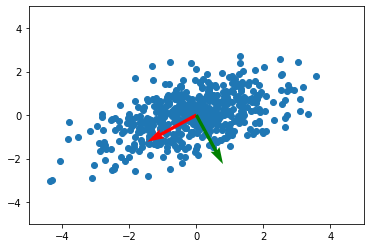

In [15]:
components = get_components(eigenvectors, n_components)
print(components)

# plt_result(X, eigenvectors[0, :], eigenvectors[1, :])
plt_result(X, components[0, :], components[1, :]) # 順番が逆

変換

In [16]:
def transform_by_pca(X, pca):
    mean = X.mean(axis=0)
    return np.dot(X-mean, components)

(-5, 5)

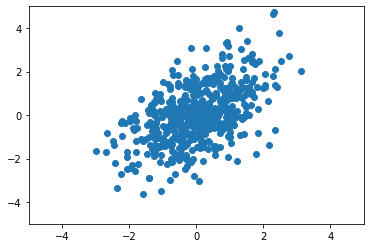

In [17]:
# 主成分分析した結果をよく見えるよう変換
Z = transform_by_pca(X, components.T)
plt.scatter(Z[:, 0], Z[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

[-0.08957901 -0.00485527]
[ 1.15463195e-17 -5.18474152e-17]


(-5, 5)

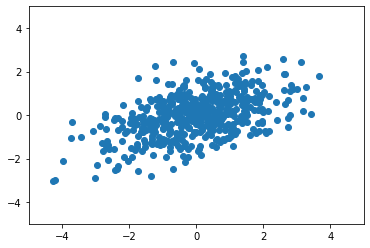

In [29]:
mean = X.mean(axis=0)
print(mean)
# 変換後のデータを逆変換するからZの平均？
mean = Z.mean(axis=0)
print(mean)
X_ = np.dot(Z, components.T) + mean
plt.scatter(X_[:, 0], X_[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [31]:
# もとに戻っている確認
print('components: {}'.format(pca.components_))
print('components: {}'.format(components))
print("")
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance())) 

components: [[-0.87839253 -0.47793991]
 [-0.47793991  0.87839253]]
components: [[-0.87839253 -0.47793991]
 [ 0.47793991 -0.87839253]]

mean: [-0.08957901 -0.00485527]
covariance: [[1.87833903 0.68098376]
 [0.68098376 0.99730618]]


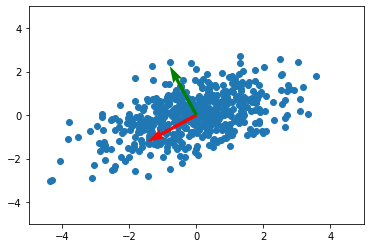

In [32]:
plt_result(X, pca.components_[0, :], pca.components_[1, :])

components: [[-0.87839253 -0.47793991]
 [-0.47793991  0.87839253]]
mean: [-0.08957901 -0.00485527]
covariance: [[1.87833903 0.68098376]
 [0.68098376 0.99730618]]


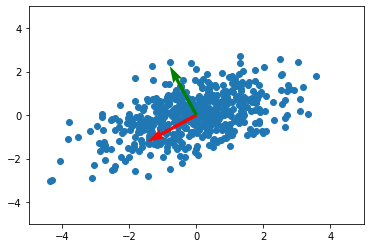

In [33]:
# sklernなら
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
plt_result(X, pca.components_[0, :], pca.components_[1, :])

print('components: {}'.format(pca.components_))
print('mean: {}'.format(pca.mean_))
print('covariance: {}'.format(pca.get_covariance()))
